# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_SARS-CoV-2_TestMetadata_with_viral.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
Query
Strand
%N
Length(nt)
Length(aa)
#Muts
%Muts
#UniqueMuts
%UniqueMuts
#ExistingMuts
%ExistingMuts
Comment
Symbol
Reference
UniqueMutList
ExistingMutList
Clade
IfExistSpecialChar


# Preprocessing and cleaning the data

In [4]:
#important features
start_data_row = 76
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['location','gender','age','status','%N','Length(nt)','Length(aa)',
                                                   '%Muts','%UniqueMuts','%ExistingMuts','ExistingMutList','Clade']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#removing the % from the data
Data['%N'] = Data['%N'].str.replace('%', ' ') 
Data['%Muts'] = Data['%Muts'].str.replace('%', ' ') 
Data['%UniqueMuts'] = Data['%UniqueMuts'].str.replace('%', ' ') 
Data['%ExistingMuts'] = Data['%ExistingMuts'].str.replace('%', ' ') 
Data['%N'].astype(float)
Data['%Muts'].astype(float)
Data['%UniqueMuts'].astype(float)
Data['%ExistingMuts'].astype(float)

0      0.04
1      0.05
2      0.13
3      0.03
4      0.03
       ... 
173    0.04
174    0.05
175    0.05
176    0.05
177    0.01
Name: %ExistingMuts, Length: 178, dtype: float64

In [6]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.dropna(subset = ['ExistingMutList'], inplace=True)
Data.index = range(len(Data))

In [7]:
#chacking if there is any null data in ExistingMutList
for i in range(len(Data)):
    if pd.isnull(Data.ExistingMutList[i]) is True:
        print('True')

In [8]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)
Data.index = range(len(Data))

In [9]:
# organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

['South America   Brazil ',
 'South America   Brazil ',
 'South America   Ecuador ',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Oceania   New Zealand ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'North America   USA   Texas ',
 'North America   USA   Texas ',
 'North America   USA   Texas ',
 'North America   USA   Texas ',
 'North America   USA   Texas ',
 'North America   USA   Texas ',
 'North America   USA   Texas ',
 'North America   USA   Texas ',
 'North America   USA   Montana',
 'Europe   Germany ',
 'Europe   Germany ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe  

In [10]:
# Data.location =listToStr_location
Data.groupby('location')
Data

,location,gender,age,status,%N,Length(nt),Length(aa),%Muts,%UniqueMuts,%ExistingMuts,ExistingMutList,Clade
0,South America / Brazil / Sao Paulo / Sao Paulo,Male,34,Released,0.00,29890.0,9710.0,0.04,0.00,0.04,"(NSP12_P323L,Spike_D614G,N_G204R,N_R203K)",G
1,South America / Brazil / Sao Paulo / Sao Paulo,Male,22,Hospitalized,0.00,29849.0,9710.0,0.05,0.00,0.05,"(NSP12_P323L,Spike_D614G,Spike_V1176F,N_G204R,...",G
2,South America / Ecuador / Pichincha,Male,40,Hospitalized,2.41,29899.0,9685.0,0.19,0.05,0.13,"(NSP6_N255K,NSP15_S293T,Spike_A288S,NS3_Q38P,N...",Other
3,Central America / Costa Rica,Male,47,Alive,0.00,29845.0,9710.0,0.04,0.01,0.03,"(NSP3_P1326L,NSP12_P323L,Spike_D614G)",G
4,Central America / Costa Rica,Male,18,Live,0.00,29834.0,9710.0,0.03,0.00,0.03,"(NSP3_P1326L,NSP12_P323L,Spike_D614G)",G
...,...,...,...,...,...,...,...,...,...,...,...,...
164,North America / USA / Puerto Rico,unknown,unknown,Asymptomatic,0.15,29793.0,9710.0,0.04,0.00,0.04,"(NSP13_P504L,NSP13_Y541C,NSP14_H26Y,NS8_L84S)",S
165,Africa / Nigeria / Ogun State,Female,30,Not Hospitalized,0.00,29846.0,9710.0,0.05,0.00,0.05,"(NSP2_P585S,NSP2_I559V,NSP6_L37F,NS3_G251V,M_C...",V
166,Oceania / Guam,Male,62,Outpatient,0.00,29903.0,9710.0,0.06,0.01,0.05,"(NSP3_T1198K,NSP6_L37F,NSP9_P83L,NSP12_A97V,N_...",Other
167,Asia / India / Maharashtra,Female,63,Mild,0.35,29903.0,9710.0,0.05,0.00,0.05,"(NSP3_T1198K,NSP6_L37F,NSP8_R51C,NSP12_A97V,N_...",Other


In [11]:
#replacing the age that were in months to year
Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')
for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'


C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Azadeh\Anaconda3\lib\site-package

In [12]:
#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')


In [13]:
Data.replace(['female','Female'],value= ['Female','Female'], inplace=True)
Data.replace(['male','Male'],value= ['Male','Male'], inplace=True)        

In [14]:
#Labeling the unknown gender as missing category
for i in range(1,len(Data)):
    index_4 = Data.gender[i].find('unknown') 
    if index_4!=-1:
        Data.gender[i] = 'missing'


C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#Finding unknown data
Data.loc[Data['gender']=='unknown']

,location,gender,age,status,%N,Length(nt),Length(aa),%Muts,%UniqueMuts,%ExistingMuts,ExistingMutList,Clade


In [17]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]),pd.get_dummies(Data[['ExistingMutList']]),pd.get_dummies(Data[['Clade']]), pd.get_dummies(Data[['gender']]), Data[['age','status','%N','Length(nt)','Length(aa)',
                                                   '%Muts','%UniqueMuts']]], axis=1)
Data_model.head()

,location_Africa / Egypt,location_Africa / Nigeria / Ogun State,location_Asia / Bangladesh / Chattogram,location_Asia / Bangladesh / Dhaka,location_Asia / China / Beijing,location_Asia / China / Fujian,location_Asia / China / Sichuan,location_Asia / China / Zhejiang / Lishui,location_Asia / Hong Kong,location_Asia / India / Gujarat / Ahmedabad,...,gender_Female,gender_Male,gender_missing,age,status,%N,Length(nt),Length(aa),%Muts,%UniqueMuts
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,34,0,0.00,29890.0,9710.0,0.04,0.00
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,22,0,0.00,29849.0,9710.0,0.05,0.00
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,40,0,2.41,29899.0,9685.0,0.19,0.05
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,47,0,0.00,29845.0,9710.0,0.04,0.01
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,18,0,0.00,29834.0,9710.0,0.03,0.00


In [18]:
#checking the balance in the data
Data_model['status'].value_counts()

0    137
1     32
Name: status, dtype: int64

# Logistic regression model

In [19]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    137
1     32
Name: status, dtype: int64

In [20]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

### Imputing the unknown data using KNN

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(X_train[['age']])
X_train['age']=imputer.transform(X_train[['age']])
X_test['age']=imputer.transform(X_test[['age']])

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Kernel PCA diemnsion reduction

#### from sklearn.decomposition import PCA, KernelPCA
kpca = KernelPCA(kernel="rbf")
kpca.fit(X_train)
#X_back = kpca.inverse_transform(X_kpca)
X_train = kpca.transform(X_train)
X_test = kpca.transform(X_test)

### Balancing the data

In [22]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

### Scaling the data

In [23]:
#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', penalty='l2',C= 1, max_iter=200, n_jobs=1, tol=0.0001)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
lr_probs = model.predict_proba(X_test)
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))

R^2 _train= 0.9908256880733946
R^2 _test= 0.9411764705882353


### Cross validation 

In [25]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())

Cross-Validation Accuracy Scores [1.         0.86363636 0.90909091 0.90909091 0.95454545 0.81818182
 0.86363636 1.         0.95238095 0.95238095]
CV-scores_min =  0.8181818181818182
CV_scores_mean = 0.9222943722943724
CV_scores_max = 1.0


In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
113,1,1
1,0,0
91,0,0
77,1,1
28,0,0
51,0,0
153,1,1
127,0,0
95,0,0
151,1,1


### Performance measurement metrics

In [27]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 0.058823529411764705
Mean Squared Error: 0.058823529411764705
Root Mean Squared Error: 0.24253562503633297


In [28]:
from sklearn.metrics import precision_recall_curve
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

In [29]:
from sklearn.metrics import f1_score
# calculate F1 score
f1 = f1_score(y_test, y_hat)
print('f1 score =', f1)

f1 score = 0.8571428571428571


In [30]:
#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
lr_probs = model.predict_proba(X_test)
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
lr_probs
print( 'roc_auc =', roc_auc_score(y_test, lr_probs[:,1]) )

roc_auc = 0.9940476190476191


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.994


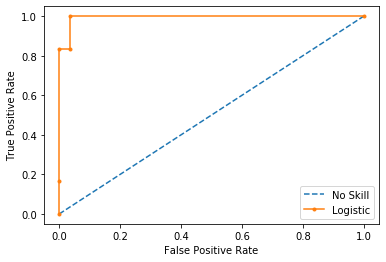

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.857 auc=0.974


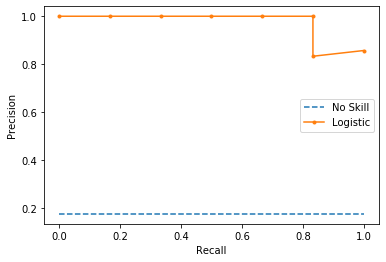

In [32]:
from sklearn.metrics import auc
lr_probs = model.predict_proba(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs[:,1])
lr_f1, lr_auc = f1_score(y_test, y_hat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()